# APS 3
### Disciplina: Redes Sociais


### Alunos:
* Matheus Silva Melo de Oliveira
* Nívea de Abreu de Dantas Lima
* Ricardo Mourão Filho

### Dataset escolhido: *Contiguous USA* 
These are the 48 contiguous states and the District of Columbia of the United States of America (the USA). They include all states except the states of Alaska and Hawaii, which are not connected by land with the other states, and include the District of Columbia (DC). An edge denotes that two states share a border. The US states in the configuration given by this dataset exist since February 14, 1912, when Arizona was admitted as the 48th state, and is current as of 2014. The states of Alaska and Hawaii were admitted as the 49th and 50th states in 1959, but are not contiguous with the other states, and are not reflected in this dataset.

[Source](http://konect.cc/networks/contiguous-usa/)

In [1]:
from netpixi.integration.gt import Graph

g = Graph(directed=False)

### Lendo o dataset, adicionando arestas e adicionando vértices

In [2]:
with open('./out.contiguous-usa', 'r') as f:
    
    while True:
        linha = f.readline()
        if not linha:
            break
        node1, node2 = int(linha.strip().split(" ")[0]), int(linha.strip().split(" ")[1])
        try:
            g.add_vertex(node1)
            g.add_vertex(node2)
        except Exception as inst:
            try:
                if int(str(inst).split(' ')[3]) == node1:
                    g.add_vertex(node2)
                else:
                    g.add_vertex(node1)
            except:
                pass
        finally:
            g.add_edge(node1,node2)

### Análise Exploratória

#### Número de vértices

In [30]:
n = g.num_vertices()
print('Número de vértices de g:', n)

Número de vértices de g: 49


#### Número de arestas

In [31]:
m = g.num_edges()
print('Número de arestas de g:', m)

Número de arestas de g: 107


#### Densidade

In [32]:
if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
max_edges

1176

In [34]:
d = m / max_edges
d
print(f'Densidade é {d:.2f}')

Densidade é 0.09


### Estatísticas
Iniciando o tratamento de dados.

In [35]:
import warnings
warnings.filterwarnings('ignore') 

In [36]:
import seaborn as sns
from netpixi.integration.gt import *
from regression.integration.gt import *

In [37]:
data = gt_data(g)
data.head(5)

""
id
1
2
3
4
5


Quantificando degrees

In [38]:
degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())

In [39]:
data['degree'] = degrees
data.head(5)

,degree
id,
1,4
2,2
3,5
4,4
5,8


#### Estatísitcas e Métricas Gerais

In [40]:
data['degree'].describe().to_frame()

,degree
count,49.000000
mean,4.367347
std,1.590255
min,1.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,8.000000


#### Histograma

<AxesSubplot: xlabel='degree', ylabel='Count'>

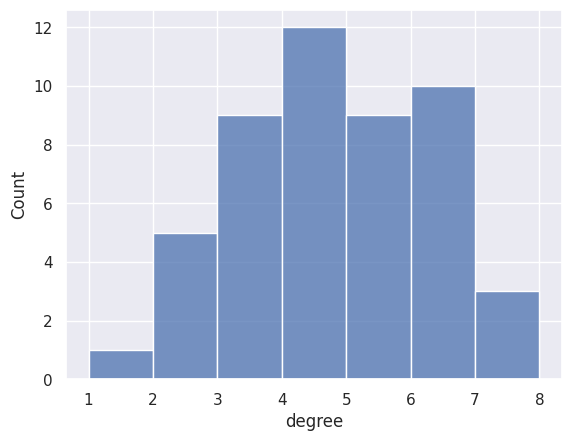

In [41]:
sns.histplot(data['degree'])

### Análise Visual

In [42]:
import netpixi

#### Salvando grafo em formato ZipNet

In [43]:
gt_save(g, 'Contiguous.net.gz')

#### Carregando modelo para visualização

In [44]:
g = gt_load('Contiguous.net.gz')

#### Visualização inicial

In [45]:
r1 = netpixi.render('Contiguous.net.gz');

<img src="Contiguous.net.gz.png">

#### Posicionando o grafo com a ideia de force-directed graph drawing

In [46]:
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'Contiguousc_sfpd.net.gz')
r2 = netpixi.render('Contiguousc_sfpd.net.gz');

In [47]:
#Ajustando propriedades
r2.vertex_default(size=20)
r2.edge_default( width=5)

<img src="Contiguousc_sfpd.net.gz.png">

#### Análise de periferia e centralidade

In [48]:
import cpnet
from graph_tool import spectral

In [2]:
matrix = spectral.adjacency(g)

# Além de cpnet.Surprise, há outras
# opções de algoritmos discretos:
# cpnet.BE
# cpnet.Lip
# cpnet.LapCore
# cpnet.LapSgnCore
# cpnet.LowRankCore

algorithm = cpnet.Surprise()
algorithm.detect(matrix)
c = algorithm.get_coreness()

# Depois do código acima, c é um dicionário
# em que as chaves são índices de vértices e
# valores são os atribuídos pelo algoritmo.

g.add_vp('core')
for i, coreness in c.items():
    v = g.get_vertex_by_index(i)
    v['core'] = int(coreness)
    
# Vamos pintar de vermelho todos os vértices
# identificados como centro e de verde todos
# os vértices identificados como periferia.
    
for v in g.all_vertices():
    if v['core'] == 1:
        r2.vertex(v['id'], color=0xff0000)
    else:
        r2.vertex(v['id'], color=0x00ff00)

# Quando a execução desta célula terminar,
# veja como ficou a visualização acima.

<img src="discreto.png">

In [1]:
matrix = spectral.adjacency(g)

# Além de cpnet.Rombach, há outras
# opções de algoritmos contínuos:
# cpnet.MINRES
# cpnet.Rossa

algorithm = cpnet.Rombach()
algorithm.detect(matrix)
c = algorithm.get_coreness()

# Depois do código acima, c é um dicionário
# em que as chaves são índices de vértices e
# valores são os atribuídos pelo algoritmo.

g.add_vp('coreness')
for i, coreness in c.items():
    v = g.get_vertex_by_index(i)
    v['coreness'] = float(coreness)

# Vamos usar coreness como referência para
# o tamanho dos vértices. Estabelecemos 10
# como o menor tamanho possível e 40 como
# o maior tamanho possível. Como o coreness
# está entre 0 e 1, a conta é bem simples.

for v in g.all_vertices():
    r2.vertex(v['id'], size=(10 + 40 * v['coreness']))

# Quando a execução desta célula terminar,
# veja como ficou a visualização acima.

<img src="continuo.png">